
<h1> Caminos más cortos en una gráfica </h1> 
<p> 
Un problema muy básico con respecto a las gráficas es determinar el camino mas corto entre 
dos nodos en tal gráfica. El siguiente algoritmo, no solo calcula el camino más corto entre dos nodos sino los caminos más
cortos entre un nodo inicial y el resto de nodos de la gráfica. 
    </p> 
    <p> 
    Se no da una grafica no dirigida $G=(V,E)$, y un nodo inicial $s$. Asumimos que la gráfica es conexa y por 
    lo tanto hay un camino del nodo inicial $s$ al resto de nodos en la gráfica. Cada arista $e$ tiene una longitud 
    $\lambda_e \leq 0$ indicando el tiempo (distancia o costo) que se toma para recorrer a $e$. Para un camino 
    $P$, la longitud de este se denotará con $\lambda(P)$ y es la suma de los costos de las aristas que lo componen. 
    </p> 


<h1> Diseñando el Algoritmo</h1>
<p> 
El algoritmo fue diseñado por Edsger Dijkstra en 1959. Funciona de la siguiente manera: 
    mantiene un conjunto $S$ de vertices para los
    cuales ha sido determinado ya el camino más corto partiendo de $s$. Esta es la parte explorada 
    de la gráfica. Ahora, para cada nodo que está en la parte no explorada $v \in V - S$, determinamos el 
    camino más corto que puede ser construido para $v$ viajando por la parte explorada a un nodo $u \in S$ seguido 
    de la arista $(u,v)$. Esto es, consideramos la cantidad $d'(v) = min_{e = (u,v):u \in S}d(u) + \lambda_e$. 
    Escogemos el nodo $v \in V - S$ para el cual esta cantidad es minimizada, añadimos $v$ a $S$ y 
    actualizamos el valor de $d(v)$ como $d'(v)$. El pseudocódigo del algoritmo se muestra a continuación: 
</p> 


<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
    <b> Algoritmo de Dijkstra($G$,$\lambda$) </b> <br> 
&nbsp; Sea $S$ el conjunto de nodos explorados<br>
&nbsp;&nbsp; para cada $u \in S$, guardar la distancia $d(u)$<br> 
&nbsp; Inicialmente $S = {s}$ y $d(s) = 0 $<br> 
&nbsp; While ($S = V$) <br>
&nbsp; &nbsp; seleccionar un nodo $v \not\in S$ con al menos una arista de $S$ para el cual<br> 
&nbsp; &nbsp; &nbsp; $d'(v) = min_{e=(u,v):u\in S} d(u) + \lambda_e$ es lo más pequeño posible <br>
&nbsp; &nbsp; Añadir $v$ to $S$ y definir $d(v) = d'(v)$ <br>
&nbsp; EndWhile <br> 

</div>


<p> La siguiente imagen describe un estado de la 
    ejecución del algoritmo para que se tenga una mejor idea de cómo funciona :</p> 
<img src="fig1.png">
<p> 
En este punto han sido añadidos los nodos $s$,$u$ y $v$ a $S$ (dentro del círculo gris). Ahora, consideremos los valores de $d'$
</p> 
\begin{equation}
\begin{split}
     d'(y) = d(u) + \lambda((u,y)) = 1 + 3 = 4 \\ 
     d'(x) = d(u) + \lambda((u,x)) = 1 + 1 = 2\\ 
     d'(z) = d(v) + \lambda((v,z)) = 2 + 3 = 5 
\end{split}
\end{equation}
<p>
    Dado que el nodo $x$ tiene el valor $d'$ mínimo de los nodos que no están en $S$
    , entonces este será agregado y 
    $d(x) = d'(x) = 2$
</p> 

<h2> Visualización de la ejecución del algoritmo</h2> 
<p> 
    El widget a continuación muestra la ejecución del algoritmo de Dijkstra sobre una gráfica. Los nodos en rosa 
    son la parte "explorada", el conjunto $S$. Las aristas en azul, son aquellas que conectan a los nodos de $S$
    con el resto. También se resalta con un círculo más grande el nodo que será elegido en la siguiente iteración. 
    para cada $v$ está anotado su identificador y $d'(v)$. Nota que cuando un nodo es coloreado de rosa, 
    se establece su distancia $d(v) = d'(v)$. Al inicio 
    $d'(v) = \infty $ para todo $v \in S$. 
</p> 

Output()

<IPython.core.display.Javascript object>


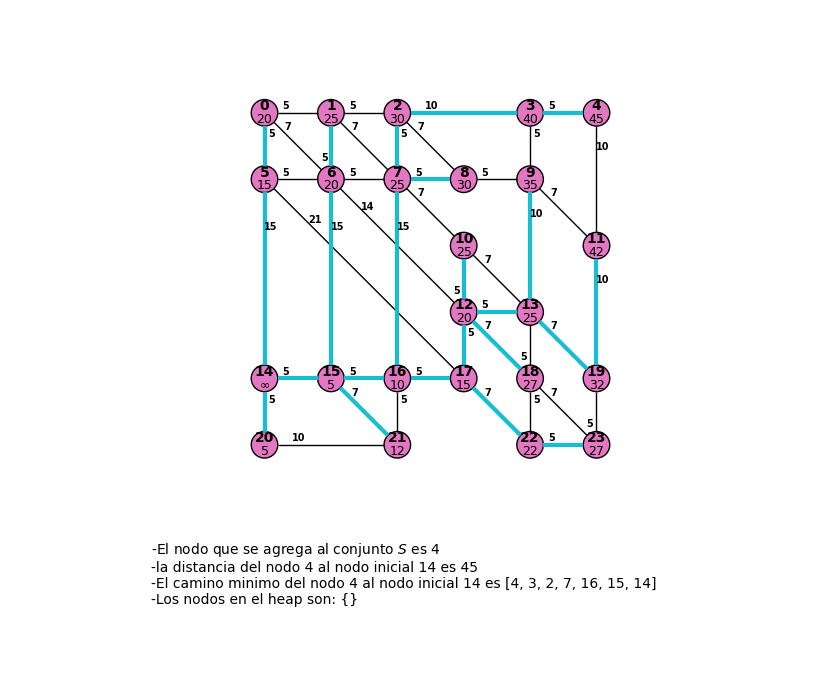

In [48]:
%run dijkstra_alg.ipynb 

<h1> Analizando el algoritmo </h1>
    <p> 
    Lo que hay que probar es que es cierto que cuando el algoritmo de Dijkstra añade un nodo $v$ a $S$, 
    obtenemos el camino mínimo a $v$. La correctitud será demostrada probando que la solución calculada por 
    el algoritmo se mantiene un paso adelante de las otras soluciones. Esto es, estableciendo inductivamente que en 
    cada paso selecciona el mejor camino, el más corto, del nodo $s$ al nodo $v$ con respecto a todos los demás 
    caminos posibles de $s$ a $v$.  
    </p> 
    <p> 
        Probaremos la siguiente proposición: considera el conjunto $S$ en cada punto de ejecución del 
        algoritmo. Entonces para cada $u \in S$ el camino $P_u$ es un $s-u$ camino mínimo. Esto inmediantamente implica
        la correctitud del algoritmo de Dijstra ya que podemos aplicarla para cuando $S$ son todos los nodos de la gráfica. 
    </p> 
    <p> 
        Lo probaremos por inducción sobre el tamaño de $S$. El caso cuando $|S|= 1$ es sencillo ya que tenemos 
        que $S = \{s\}$ y $d(s)= 0$. Ahora, supogamos que la proposición es verdadera para $|S| = k$ para alguna $k \geq 1$
        lo que haremos es incrementar el tamano de $S$ a $k+1$ añadiendo el nodo $v$. Sea $(u,v)$ la arista final en 
        el $s-v$ camino $P_v$
    </p> 
    <p> 
        Por hipótesis de inducción tenemos que $P_u$ es un $s-u$ camino más corto para cada $u \in S$. Ahora, 
    consideremos cualquier otro $s-v$ camino $P$, queremos mostrar que es al menos tan largo como $P_v$. Este 
    camino $P$ debe dejar el conjunto $S$ en algún punto. Sea $y$ el primer nodo en $P$ que no está en $S$ y 
    sea $x \in S$ el nodo que está junto antes de $y$. La siguiente imagen ilustra lo anteriormente dicho. El camino 
    rojo es $P$ y el camino azul es $P_v$
    </p> 
    <img src="fig2.png"> 
    <p>
        Ahora, el argumento es bastante simple: $P$ no puede ser más corto que $P_v$ porque $P_v$ ya era más corto cuando 
    ambos dejó el conjunto $S$. Esto es cierto pues en la iteración $k+1$ el algoritmo de 
    Dijkstra consideró añadir al nodo $y$ a través de la arista $(x,y)$ y fue rechazado en favor de $v$. 
    Esto quiere decir que no hay un camino que comience 
    en $s$ hacia $y$ a través de $x$ y que sea más corto que $P_v$. Y si el subcamino de $P$ que llega hasta $y$ es más 
    largo que $P_v$ entonces, dado que los pesos de las aristas no son negativos, $P$ es más largo que $P_v$. 
    </p>



<h1> Implementación y tiempo de ejecución </h1> 
<p> 
Consideremos el bucle While en el pseudocódigo. Este bucle se ejecuta  $n-1$ veces ya que en cada una 
de estas se añade un nodo al conjunto $S$. Seleccionar el nodo es lo difícil. Un primer acercamiento 
sería considerar a cada nodo $v \not \in S$ y revisar todas aristas entre $v$ y $S$ para determinar el 
$min_{e = (u,v):u \in S}d(u) + \lambda_e$ y seleccionar el nodo que tenga la menor de estas cantidades. Para 
una gráfica que tiene $m$ aristas. Calcular esto nos costaria $O(mn)$
</p> 
<p> 
    Este proceso lo podemos hacer mucho mejor si se usan las estructuras de datos adecuadas. Primero
vamos a mantener explicitamente los valores mínimos $d'(v) = min_{e=(u,v):u \in S}d(u) + \lambda_e$ para 
    cada uno de los nodos $v \in V-S$ en lugar de recalcularlos en 
cada iteración. Podemos mejorar aún más la eficiencia si mantenemos a los nodos $V-S$ en una cola de prioridades 
con $d'(v)$ como su llave. Una cola de prioridades puede eliminar el mínimo, insertar y cambiar una llave 
eficientemente, con complejidad $O(\log(n))$.
</p> 

<h2> Pseudocódigo de Dijkstra implementado con una cola de prioridades</h2> 
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;"><b> 
    Algoritmo de Dijkstra($G$,$\lambda$) </b> <br>
    &nbsp;$colaP = {(s,0)}$ <br> 
    &nbsp;While($colaP \neq \emptyset$) <br> 
    &nbsp;&nbsp;$(v,d'(v))= colaP.obtMin()$ <br>  
    &nbsp;&nbsp;agrega $v$ a $S$ <br> 
    &nbsp;&nbsp;for $w \in vecinos(v)$ <br> 
    &nbsp;&nbsp;&nbsp;if($d'(v) + \lambda_{(v,w)}< d'(w)$)<br> 
    &nbsp;&nbsp;&nbsp;&nbsp;$colaP.actualizaLLave(w,d'(v) + \lambda_{(v,w)})$<br> 
</div>


<p> 
    Veámos ahora la complejidad del algoritmo. 
    Para añadir el nuevo nodo al conjunto $S$ utilizamos el método $obtMin$. Para actualizar las llaves considera la situación en la que $v$ está en $S$ y $w \not \in S$ pero está en la cola de prioridades. 
    Actualizando el valor de $d'(w)$ tenemos dos casos si $(v,w)$ no es una arista entonces no hay que hacer nada. Si $e' = (v,w) \in E$ , el nuevo valor de $d'(w) = min(d'(w),d(v) + \lambda_{e'})$. Si resulta que $d'(w) > d(v) + \lambda_{e'}$ entonces tenemos que utilizar el metodo $actualizaLLave$ sobre $w$ para hacer más pequeña su llave. Esta operación de $actualizaLLave$ puede ocurrir a lo más una vez por cada arista, cuando el extremo de la arista es añadida a $S$. De aquí tenemos que el algoritmo de Dijkstra puede ser implementado en una grafica con $n$ nodos y $m$ aristas en tiempo $O(m)$ más  el tiempo de $n$ $obtMint$ y $m$ $actualizaLLave$ operaciones. Esto nos da un tiempo total de $O(m \log (n))$
</p> 